In [27]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

In [28]:
def f1(t, S, I, R):
    N = S + I + R
    return -beta*S*I/N

In [29]:
def f2(t, S, I, R):
    N = S + I + R
    return beta*S*I/N - gamma*I

In [30]:
def f3(t, S, I, R):
    N = S + I + R
    return gamma*I

In [31]:
def params(t0, S0, I0, R0, h, f1, f2, f3):
    k1 = h*f1(t0, S0, I0, R0)
    l1 = h*f2(t0, S0, I0, R0)
    m1 = h*f3(t0, S0, I0, R0)
    
    k2 = h*f1(t0 + h/2, S0 + k1/2, I0 + l1/2, R0 + m1/2) 
    l2 = h*f2(t0 + h/2, S0 + k1/2, I0 + l1/2, R0 + m1/2) 
    m2 = h*f3(t0 + h/2, S0 + k1/2, I0 + l1/2, R0 + m1/2) 
    
    k3 = h*f1(t0 + h/2, S0 + k2/2, I0 + l2/2, R0 + m2/2)
    l3 = h*f2(t0 + h/2, S0 + k2/2, I0 + l2/2, R0 + m2/2)
    m3 = h*f3(t0 + h/2, S0 + k2/2, I0 + l2/2, R0 + m2/2)
    
    k4 = h*f1(t0 + h, S0 + k3, I0 + l3, R0 + m3) 
    l4 = h*f2(t0 + h, S0 + k3, I0 + l3, R0 + m3)
    m4 = h*f3(t0 + h, S0 + k3, I0 + l3, R0 + m3)
    
    ks = [k1, k2, k3, k4]
    ls = [l1, l2, l3, l4]
    ms = [m1, m2, m3, m4]
    
    return ks, ls, ms

In [32]:
def nextS(S_prev, k1, k2, k3, k4):
    S = S_prev + 1/6*(k1 + 2*k2 + 2*k3 + k4)
    return S

def nextI(I_prev, l1, l2, l3, l4):
    I = I_prev + 1/6*(l1 + 2*l2 + 2*l3 + l4)
    return I

def nextR(R_prev, m1, m2, m3, m4):
    R = R_prev + 1/6*(m1 + 2*m2 + 2*m3 + m4)
    return R

In [33]:
def SIR_model(num_iters, beta, gamma, S0, I0, R0, t0, h):
    Ss = [S0]
    Is = [I0]
    Rs = [R0]
    ts = [0]
    Ns = [S0 + I0 + R0]
    
    
    for i in range(1, num_iters):
        ks, ls, ms = params(t0, Ss[-1], Is[-1], Rs[-1], i*h, f1, f2, f3)

        S_new = (nextS(Ss[-1], ks[0], ks[1], ks[2], ks[3]))
        I_new = (nextI(Is[-1], ls[0], ls[1], ls[2], ls[3]))
        R_new = (nextR(Rs[-1], ms[0], ms[1], ms[2], ms[3]))


        if S_new < 0 or I_new < 0 or R_new < 0:
            break
#         print(i, S_new, I_new, R_new, i*h)

        Ss.append(S_new)
        Is.append(I_new)
        Rs.append(R_new)
        Ns.append(S_new+I_new+R_new)
        ts.append(t0 + h*i)
        
    return Ss, Is, Rs, ts

In [34]:
beta = 0.3
gamma = 0.015
h = 0.002
num_iters = 500
S0 = 0.999
I0 = 0.001
R0 = 0
Ss, Is, Rs, ts = SIR_model(num_iters, beta, gamma, S0, I0, R0, 0, h) 

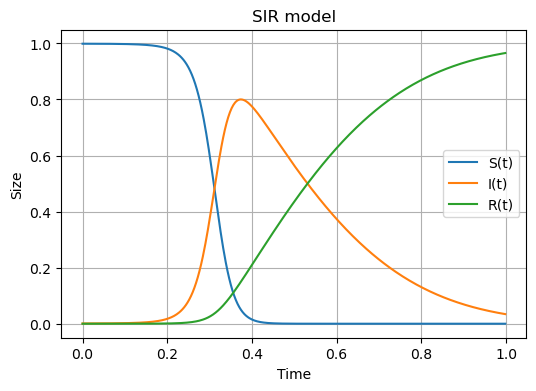

In [35]:
plt.figure(figsize = [6, 4])
plt.plot(ts, Ss, label = "S(t)")
plt.plot(ts, Is, label = "I(t)")
plt.plot(ts, Rs, label = "R(t)")

plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Size")
plt.title("SIR model")

plt.show()

In [36]:
# ## animation
# fig, ax = plt.subplots(figsize=(6, 4), dpi=80)

# def update(frame):
#     ax.clear()
    
#     ax.set_xlim([0, 1])
#     ax.set_ylim([0, 1])
    
#     if frame < len(Ss):
#         ax.plot(ts[:frame], Ss[:frame], label = "S(t)")
#     else:
#         ax.plot(ts, Ss, label = "S(t)")
        
#     if frame < len(Is):
#         ax.plot(ts[:frame], Is[:frame], label = "I(t)")
#     else:
#         ax.plot(ts, Is, label = "S(t)")
        
#     if frame < len(Rs):
#         ax.plot(ts[:frame], Rs[:frame], label = "R(t)")
#     else:
#         ax.plot(ts, Rs, label = "S(t)")
        
#     ax.set_title('SIR epidemioloski model')
#     ax.set_xlabel('Vreme')
#     ax.set_ylabel('Populacija')
#     ax.legend()
#     ax.grid(True)

In [37]:
# ani = animation.FuncAnimation(fig, update, frames=max(len(Ss), len(Is)) + 60, repeat=False, interval=h * 10)
# ani.save('animation.gif', fps=30, writer='pillow')

# PHASE PLOTTING

In [38]:
import numpy as np

In [39]:
def f(t, y):
#     S0=0.8
#     I0=0.2
#     R=1-S0-I0
#     beta=1
#     gamma=1/10
    mu=5e-4;
    return [mu-beta*y[0]*y[1]-mu*y[0], beta*y[0]*y[1]-gamma*y[1]-mu*y[1]]

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), dpi=80)

def update(frame):
    ax[0].clear()
    
    ax[0].set_xlim([-0.05, 1])
    ax[0].set_ylim([-0.05, 1])
    ##
    y1 = np.linspace(-0.05, 1, 20)
    y2 = np.linspace(-0.05, 1, 20)

    [x, y] = np.meshgrid(y1, y2)

    u = np.zeros(x.shape)
    v = np.zeros(y.shape)

    shape1,shape2=y.shape
    
    for i in range(shape1):
        res = f(ts[i], [x[i], y[i]])
        u[i] = res[0]
        v[i] = res[1]
        
    widths = np.linspace(0, 1, x.size)
    ax[0].quiver(x, y, u, v, linewidths = widths, color="r")
    ##
    if frame < len(Ss):
        ax[0].plot(Ss[:frame], Is[:frame], label = "S(t)")
    else:
        ax[0].plot(Ss, Is, label = "S(t)")
        
    ax[0].set_title('Fazni portret SIR modela')
    ax[0].set_xlabel('S(t)')
    ax[0].set_ylabel('I(t)')
    ax[0].legend()
    ax[0].grid(True)
    
    ####################################
    ax[1].clear()
    
    ax[1].set_xlim([0, 1.05])
    ax[1].set_ylim([0, 1.05])
    
    if frame < len(Ss):
        ax[1].plot(ts[:frame], Ss[:frame], label = "S(t)")
    else:
        ax[1].plot(ts, Ss, label = "S(t)")
        
    if frame < len(Is):
        ax[1].plot(ts[:frame], Is[:frame], label = "I(t)")
    else:
        ax[1].plot(ts, Is, label = "S(t)")
        
    if frame < len(Rs):
        ax[1].plot(ts[:frame], Rs[:frame], label = "R(t)")
    else:
        ax[1].plot(ts, Rs, label = "S(t)")
        
    ax[1].set_title('SIR epidemioloski model')
    ax[1].set_xlabel('Vreme')
    ax[1].set_ylabel('Udeo populacije')
    ax[1].legend()
    ax[1].grid(True)


ani1 = animation.FuncAnimation(fig, update, frames=max(len(Ss), len(Is)) + 60, repeat=False, interval=h * 10)
ani1.save('animation1.gif', fps=30, writer='pillow')
# plt.plot(Ss, Is)

# COMPARISON

In [ ]:
S = np.zeros(num_iters)
I = np.zeros(num_iters)
R = np.zeros(num_iters)
t = np.arange(num_iters)*h

S[0] = S0
I[0] = I0
R[0] = R0

In [ ]:
S[490]

In [ ]:
for i in range(num_iters-1):
    N = S[i] + I[i] + R[i]
    S[i+1] = S[i] - beta*(S[i]*I[i])/N
    I[i+1] = I[i] + (beta*S[i]*I[i]-gamma*I[i])/N
    R[i+1] = R[i] + (gamma*I[i])

In [ ]:
fig, axis= plt.subplots(1, 2, figsize = (10, 6))
axis[0].plot(t, S)
axis[0].plot(t, I)
axis[0].plot(t, R)

axis[1].plot(ts, Ss)
axis[1].plot(ts, Is)
axis[1].plot(ts, Rs)

In [ ]:
sum([(x-y)**2 for x, y in zip(Ss, S)])